<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA37_FaceNet_%E5%92%8C%E7%89%B9%E5%BE%B5%E5%90%91%E9%87%8F%E7%9A%84%E5%B0%8B%E6%89%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
!pip install -U tensorflow-addons
from tensorflow_addons.losses import TripletSemiHardLoss

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28*28)/255
x_test = x_test.reshape(-1, 28*28)/255

### 1. 建立我們的 FaceNet 神經網路模型

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2))

In [ ]:
model.compile(optimizer=Adam(0.001), 
                   loss=TripletSemiHardLoss(margin=0.87))

In [ ]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0483
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0296
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0219


In [ ]:
def representation(x, y):
    y_pred = model.predict(x)
    idx = np.random.randint(x.shape[0], size=2000)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'lime', 'orange', 'purple']
    for label, c in enumerate(colors):
        label_idx = idx[y[idx]==label]
        plt.scatter(y_pred[label_idx, 0], y_pred[label_idx, 1], 
                    c=c, label=str(label))
    plt.legend();

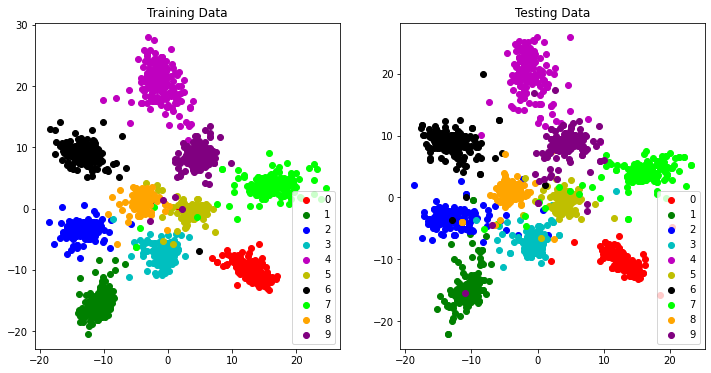

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
representation(x_train, y_train)
plt.title("Training Data")
plt.subplot(1, 2, 2)
representation(x_test, y_test)
plt.title("Testing Data");